Tehreem Qasim: https://www.linkedin.com/in/tehreem-qasim/

In [27]:
import pandas as pd
df = pd.read_csv("/kaggle/input/plant-growth-data-classification/plant_growth_data.csv")
df.head()


,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [28]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Soil_Type         193 non-null    object 
 1   Sunlight_Hours    193 non-null    float64
 2   Water_Frequency   193 non-null    object 
 3   Fertilizer_Type   193 non-null    object 
 4   Temperature       193 non-null    float64
 5   Humidity          193 non-null    float64
 6   Growth_Milestone  193 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 10.7+ KB


In [29]:
df.isna().sum()

Soil_Type           0
Sunlight_Hours      0
Water_Frequency     0
Fertilizer_Type     0
Temperature         0
Humidity            0
Growth_Milestone    0
dtype: int64

In [30]:
df.duplicated().sum()

0

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

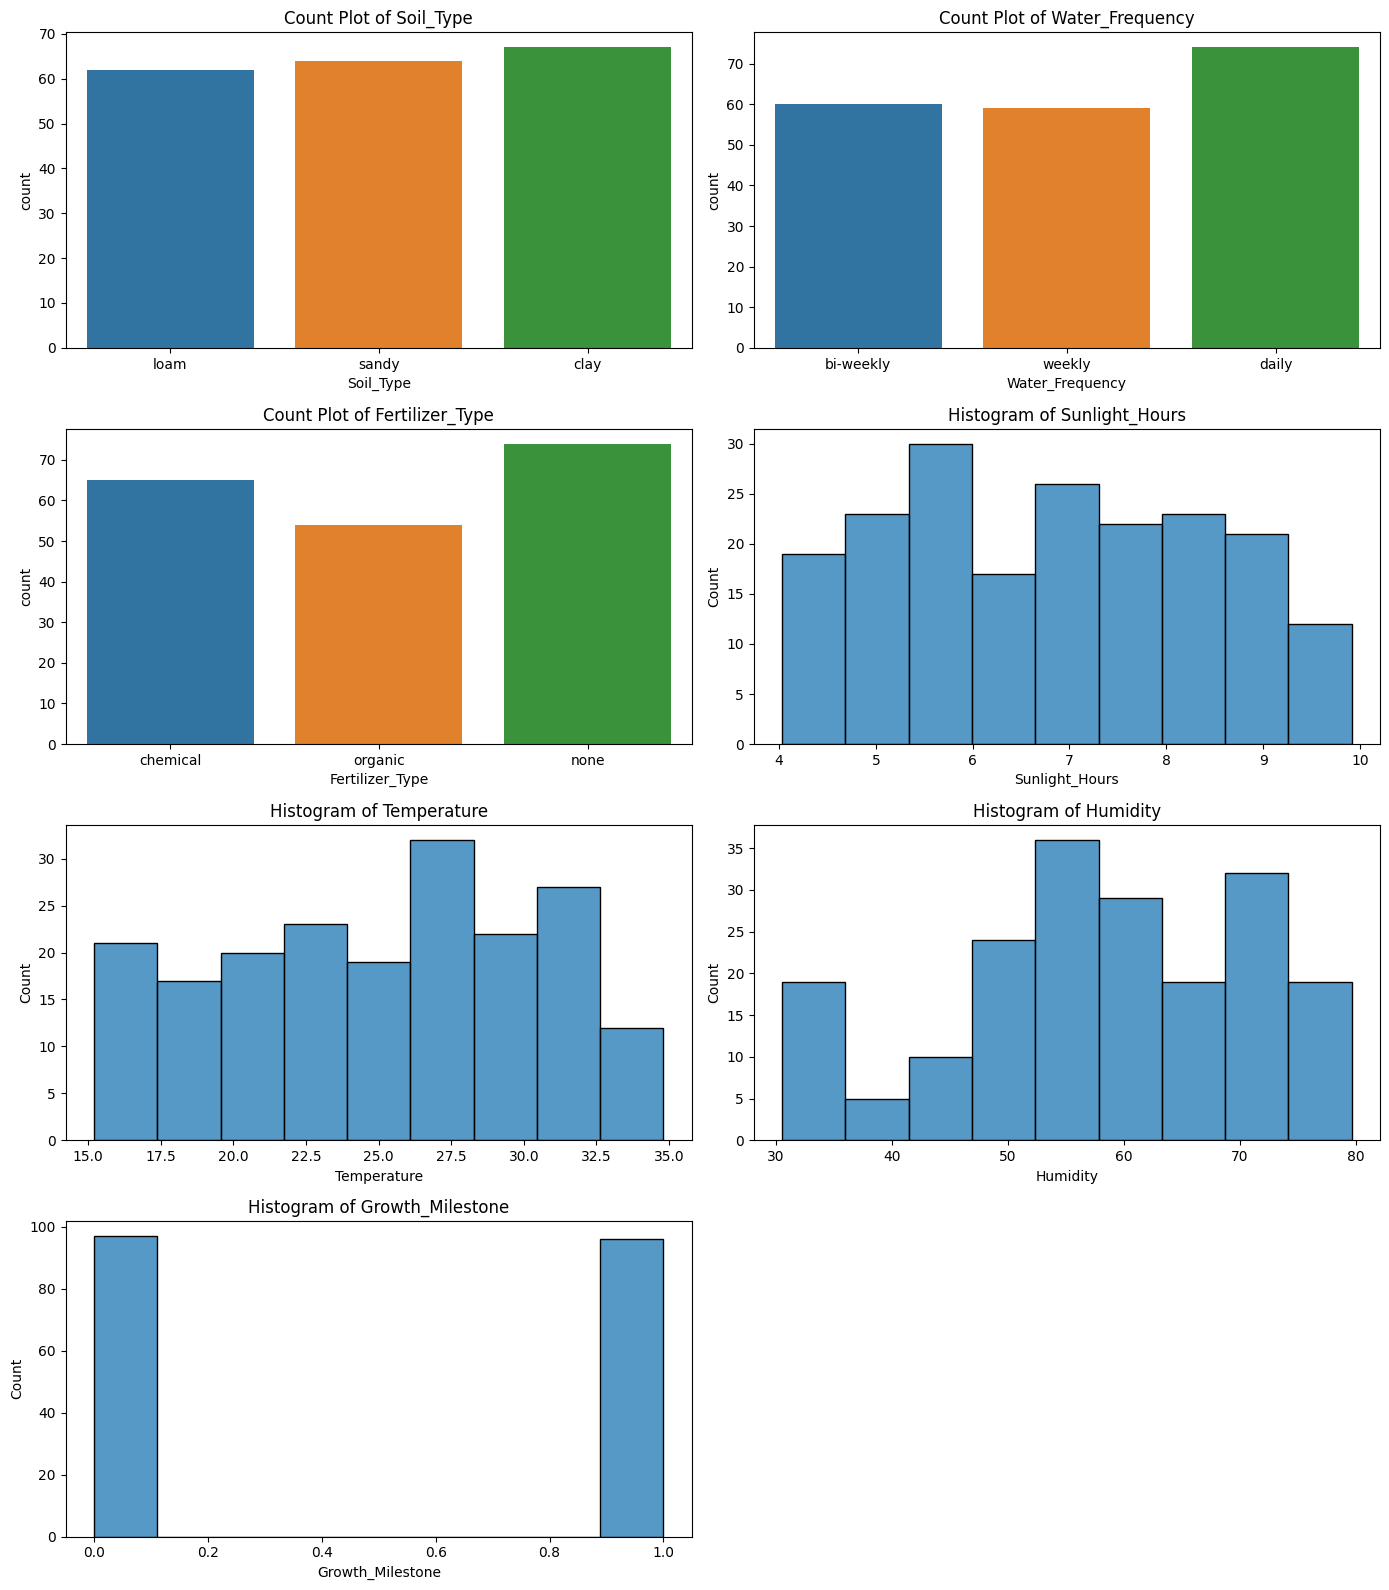

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns


# Determining the number of subplots needed
total_columns = len(categorical_columns) + len(numerical_columns)
rows = (total_columns + 1) // 2  # Adjust this for layout preferences

# Creating subplots
fig, axes = plt.subplots(rows, 2, figsize=(14, rows * 4))
axes = axes.flatten()  # Flatten to make it easier to iterate

# Plotting countplots for categorical columns
for i, col in enumerate(categorical_columns):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Count Plot of {col}')

# Plotting histograms for numerical columns
for i, col in enumerate(numerical_columns, start=len(categorical_columns)):
    sns.histplot(df[col], kde=False, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')

# Removing any empty subplots
for j in range(total_columns, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [32]:
X = df.drop("Growth_Milestone",axis = 1)
y = df["Growth_Milestone"]

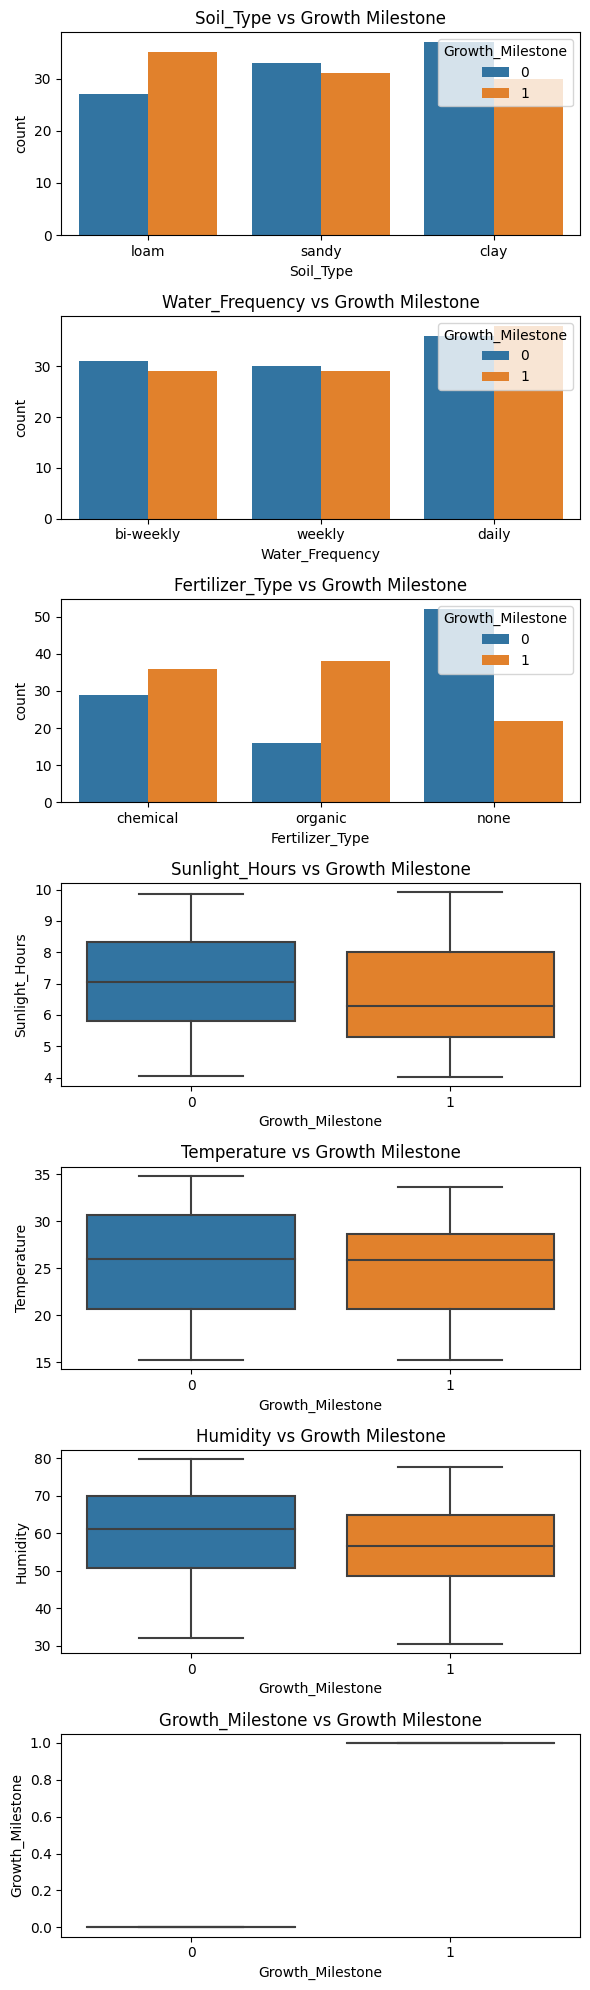

In [33]:
#Analysis of X wrt y
import matplotlib.pyplot as plt
import seaborn as sns


# Create subplots for categorical and numerical columns
fig, axes = plt.subplots(len(categorical_columns) + len(numerical_columns), 1, figsize=(6, 20))
axes = axes.flatten()

# Plot for categorical columns
for i, col in enumerate(categorical_columns):
    sns.countplot(x=df[col], hue=df['Growth_Milestone'], ax=axes[i])
    axes[i].set_title(f'{col} vs Growth Milestone')

# Plot for numerical columns
for i, col in enumerate(numerical_columns, start=len(categorical_columns)):
    sns.boxplot(x=df['Growth_Milestone'], y=df[col], ax=axes[i])
    axes[i].set_title(f'{col} vs Growth Milestone')

plt.tight_layout()
plt.show()


In [34]:
X = pd.get_dummies(X)
X.shape

(193, 12)

In [35]:
#Scaling X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

classifiers = {
    'RandomForest': RandomForestClassifier(),
    'SVC': SVC(),
    'DecisionTree': DecisionTreeClassifier(),
    'KNeighbors': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(max_iter = 1000),
}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy: {accuracy:.4f}")


RandomForest: Accuracy: 0.6207
SVC: Accuracy: 0.6034
DecisionTree: Accuracy: 0.4310
KNeighbors: Accuracy: 0.6034
LogisticRegression: Accuracy: 0.5517


In [38]:
#Tuning the best performing classifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


classifiers = {
    'RandomForest': (RandomForestClassifier(), {
        'n_estimators': [100, 200, 300, 400],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    })}

for name, (clf, params) in classifiers.items():
    grid_search = GridSearchCV(clf, params, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X, y)
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: Best Params: {grid_search.best_params_}, Accuracy: {accuracy:.4f}")


RandomForest: Best Params: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}, Accuracy: 0.9483


RandomForest: Best Params: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}, Accuracy: 0.9483